# Clustering Project

In [1]:
# Importing data handle libraries
import numpy as np
import pandas as pd

# Importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style='darkgrid')

In [2]:
# Reading dataset using pandas
df = pd.read_csv('Mall_Customers.csv')

# Check first five rows
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking characteristics of the dataset using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Checking statistical information
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Checking skewness
df.skew()

CustomerID                0.000000
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

The level of skewness is considered moderate (>-0.5 and <0.5), so it is not a relevant parameter for this analysis.

## Visualisation

In [6]:
def hist(j,col,ax):
    ax=ax[j]
    sns.histplot(x=col, data=df, kde=True, bins=20,ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, fontweight='bold')

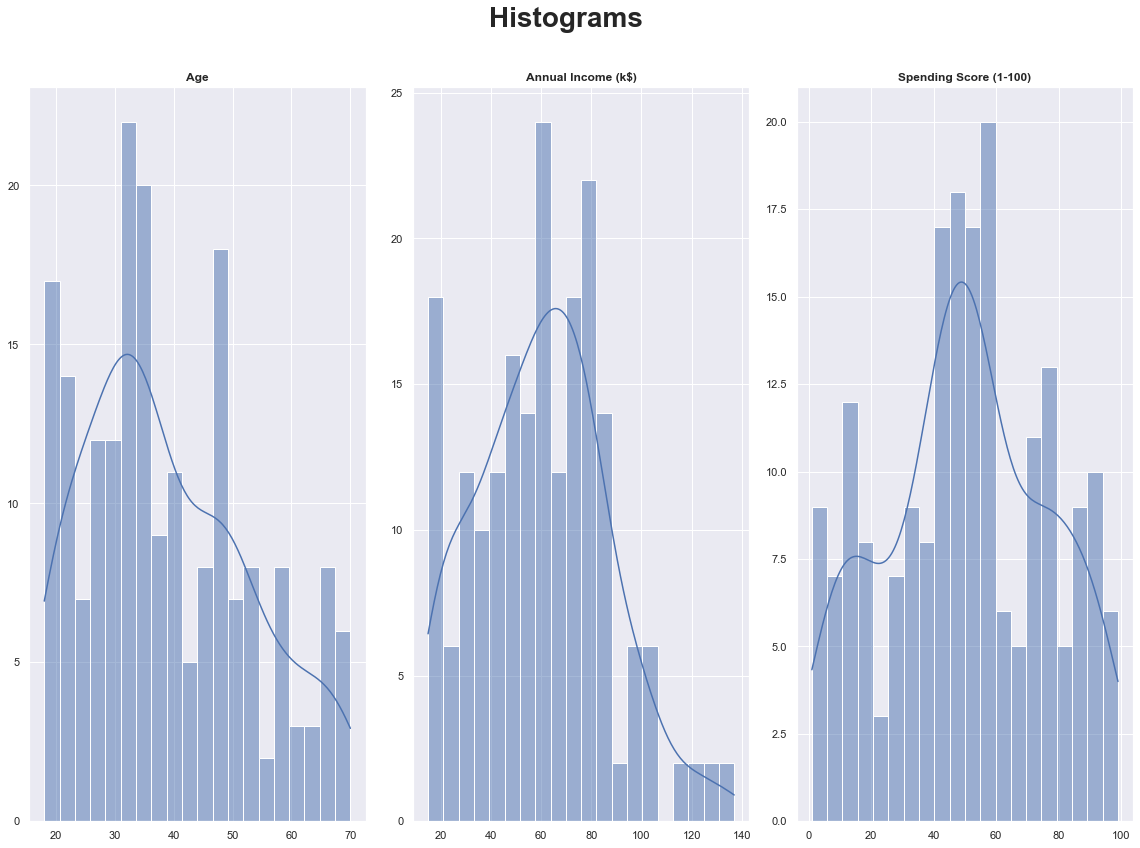

In [7]:
fig, ax = plt.subplots(1,3, figsize=(16,12))
plt.suptitle('Histograms \n', fontsize=28, fontweight='bold')

hist(0,'Age',ax)
hist(1,'Annual Income (k$)',ax)
hist(2,'Spending Score (1-100)', ax)

plt.tight_layout();

In [8]:
# Checking outliers using box plot

def box_plot(j,col,ax):
    ax=ax[j]
    sns.boxplot(y=col, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(col, fontweight='bold')

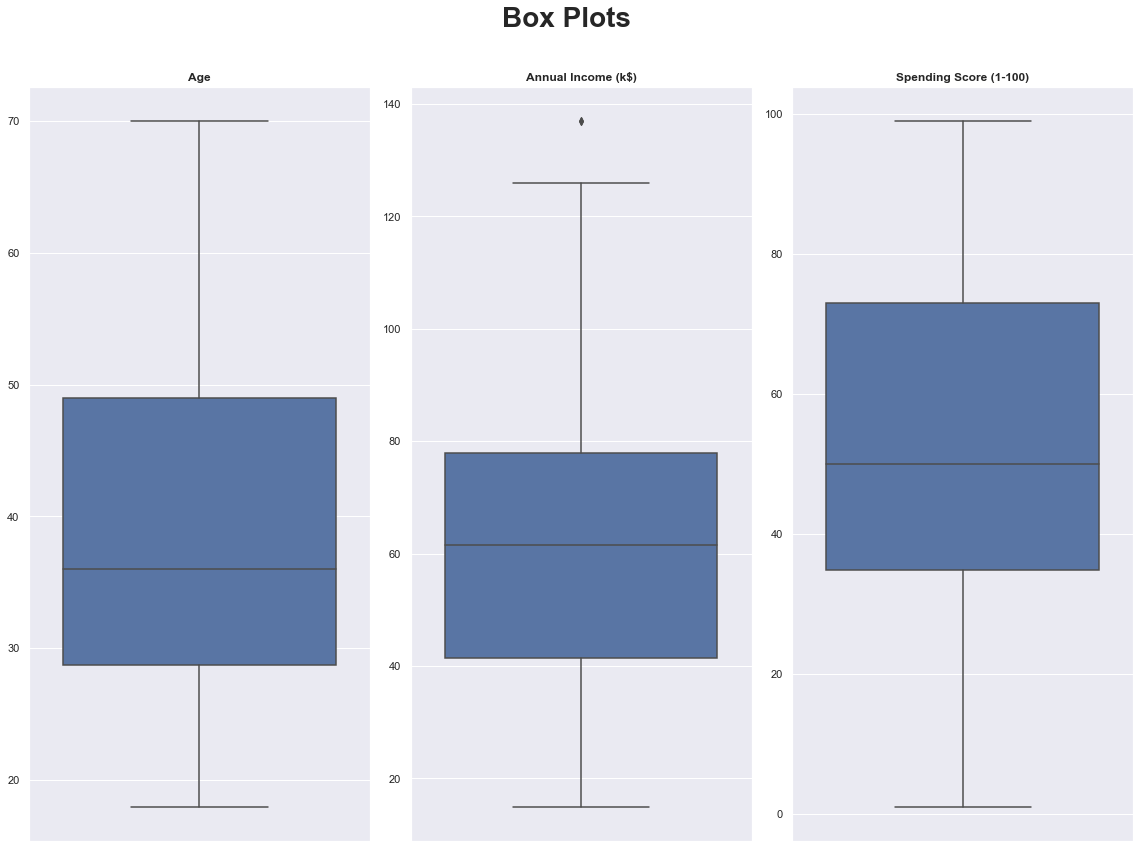

In [9]:
fig, ax = plt.subplots(1,3, figsize=(16,12))
plt.suptitle('Box Plots \n', fontsize=28, fontweight='bold')

box_plot(0,'Age',ax)
box_plot(1,'Annual Income (k$)',ax)
box_plot(2,'Spending Score (1-100)', ax)

plt.tight_layout();

It was identify the presence of outliers in the column Annual Income. Those will be treated shortly.

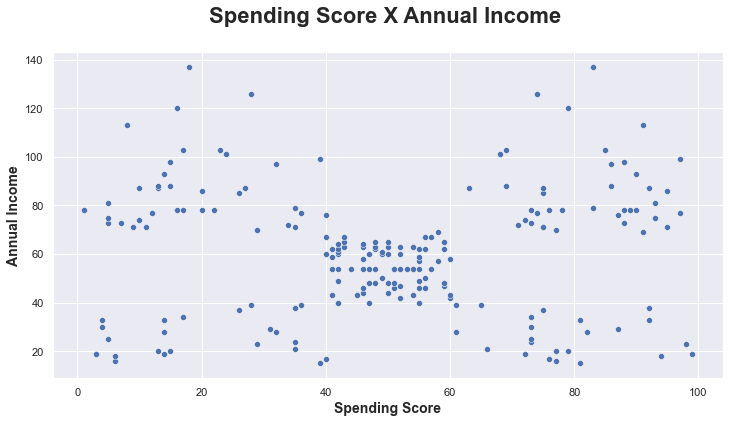

In [10]:
# Plotting the relation between Spending Score and Annual Income to check for clusters\
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df, ax=ax)
ax.set_xlabel('Spending Score',fontsize=14, fontweight='bold')
ax.set_ylabel('Annual Income', fontsize=14, fontweight='bold')
ax.set_title('Spending Score X Annual Income \n', fontsize=22, fontweight='bold');

## Data cleaning

In [11]:
# To treat the outliers first I calculated the Interquartile Range (IQR)
Q1 = df['Annual Income (k$)'].quantile(0.25)
Q3 = df['Annual Income (k$)'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Then I stablished the lower and upper limits
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
print('low_limit is', lower)
print('up_limit is', upper)

low_limit is -13.25
up_limit is 132.75


In [13]:
outlier = []
for x in df['Annual Income (k$)']:
    if ((x> upper) or (x<lower)):
        outlier.append(x)
        df['Annual Income (k$)'].replace(x, df['Annual Income (k$)'].mean(), inplace=True)
print('Outlier in the dataset is: ', outlier)

Outlier in the dataset is:  [137, 137]


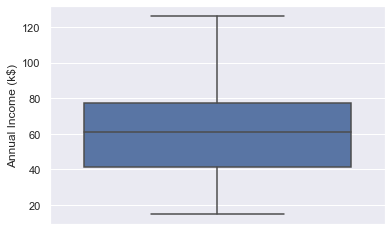

In [14]:
sns.boxplot(y='Annual Income (k$)', data=df);

In [15]:
outlier = []
for x in df['Annual Income (k$)']:
    if ((x> upper) or (x<lower)):
         outlier.append(x)
print('Outlier in the dataset is: ', outlier)

Outlier in the dataset is:  []


- Fazer encoder
- gráfico do cotovelo
- aplicar k-means
- fazer gráfico